# House Prices Modeling: Machine Learning Class

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels

# Data fields
## Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.  
* MSSubClass: The building class  
* MSZoning: The general zoning classification  
* LotFrontage: Linear feet of street connected to property  
* LotArea: Lot size in square feet  
* Street: Type of road access  
* Alley: Type of alley access  
* LotShape: General shape of property  
* LandContour: Flatness of the property  
* Utilities: Type of utilities available  
* LotConfig: Lot configuration  
* LandSlope: Slope of property  
* Neighborhood: Physical locations within Ames city limits  
* Condition1: Proximity to main road or railroad  
* Condition2: Proximity to main road or railroad (if a second is present)  
* BldgType: Type of dwelling  
* HouseStyle: Style of dwelling  
* OverallQual: Overall material and finish quality  
* OverallCond: Overall condition rating  
* YearBuilt: Original construction date  
* YearRemodAdd: Remodel date  
* RoofStyle: Type of roof  
* RoofMatl: Roof material  
* Exterior1st: Exterior covering on house  
* Exterior2nd: Exterior covering on house (if more than one material)  
* MasVnrType: Masonry veneer type  
* MasVnrArea: Masonry veneer area in square feet  
* ExterQual: Exterior material quality  
* ExterCond: Present condition of the material on the exterior  
* Foundation: Type of foundation  
* BsmtQual: Height of the basement  
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

# Ames - IOWA

![Ames -  Iowa](https://www.traveliowa.com/userdocs/cities/814_MainStreetBenches-byFayeGilbert.jpg)

## It's quite big, 66 thousand people live there

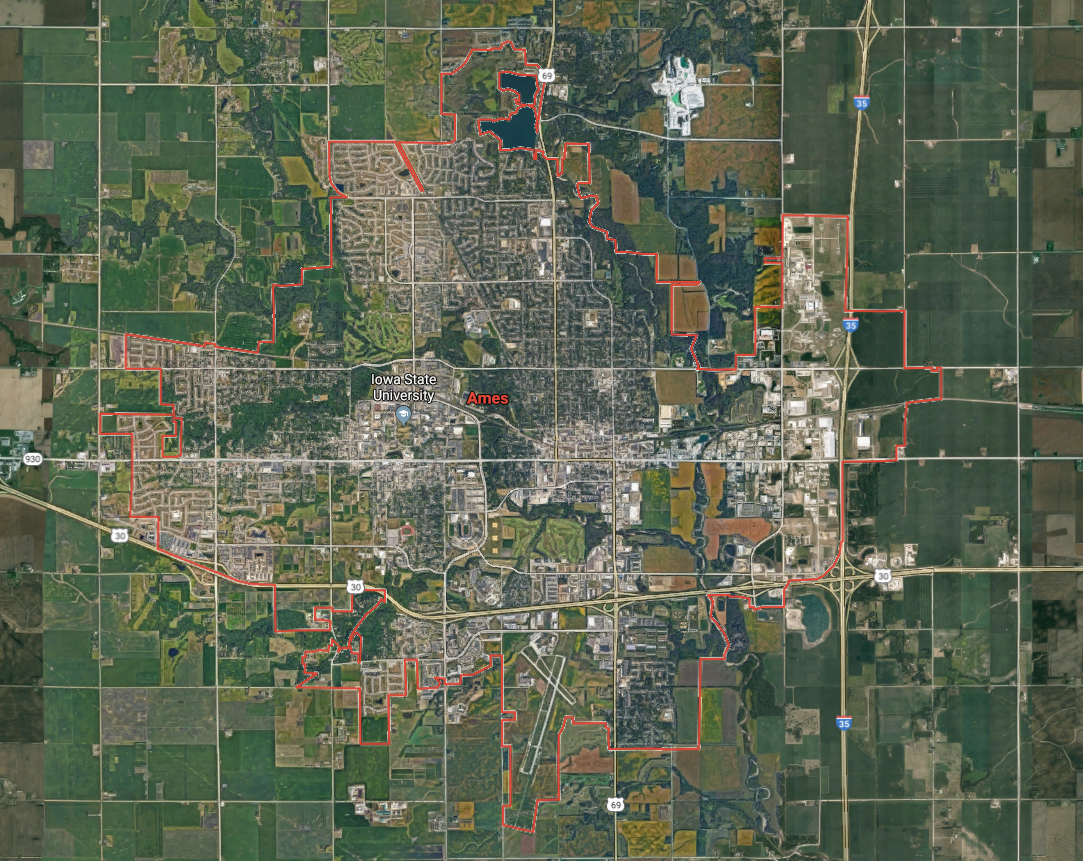

# Libraries

In [218]:
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import shuffle
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn import neighbors
from sklearn import linear_model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error

In [3]:
# Center all plots by CSS
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Data import

In [4]:
pd.set_option("display.max_columns",50)
pd.set_option('display.float_format', lambda x: '%.2f' %x)
data = pd.read_csv('data/train.csv')
data = data.rename(index=str, columns={"1stFlrSF": "FirstFloor", "2ndFlrSF": "SecondFloor"})

* We need to rename two of our collumn names to make them easier to handle in future purposes
* We have scipen the scientific notation in pandas DataFrame to make it easy to read

## Glimpse the data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null o

In [6]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL        65.00     8450   Pave   NaN      Reg   
1   2          20       RL        80.00     9600   Pave   NaN      Reg   
2   3          60       RL        68.00    11250   Pave   NaN      IR1   
3   4          70       RL        60.00     9550   Pave   NaN      IR1   
4   5          60       RL        84.00    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd    ...      \
0          2003     Gable  CompShg     VinylSd     VinylSd    ...       
1          1976     Gable  CompShg     MetalSd     MetalSd    ...       
2          2002     Gable  CompShg     VinylSd     VinylSd    ...       
3          1970     Gable  CompShg     Wd Sdng     Wd Shng    ...       
4          2000     Gable  CompShg     VinylSd     VinylSd    ...       

  Fireplaces  FireplaceQu GarageType GarageYrBlt GarageFinish GarageCars  \
0          0          NaN     Attchd     2003.00          RFn          2   
1          1           TA     Attchd     1976.00          RFn          2   
2          1           TA     Attchd     2001.00          RFn          2   
3          1           Gd     Detchd     1998.00          Unf          3   
4          1           TA     Attchd     2000.00          RFn          3   

  GarageArea GarageQual GarageCond  PavedDrive WoodDeckSF  OpenPorchSF  \
0        548         TA         TA           Y          0           61   
1        460         TA         TA           Y        298            0   
2        608         TA         TA           Y          0           42   
3        642         TA         TA           Y          0           35   
4        836         TA         TA           Y        192           84   

   EnclosedPorch  3SsnPorch ScreenPorch PoolArea PoolQC Fence  MiscFeature  \
0              0          0           0        0    NaN   NaN          NaN   
1              0          0           0        0    NaN   NaN          NaN   
2              0          0           0        0    NaN   NaN          NaN   
3            272          0           0        0    NaN   NaN          NaN   
4              0          0           0        0    NaN   NaN          NaN   

   MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0        0       2    2008        WD         Normal     208500  
1        0       5    2007        WD         Normal     181500  
2        0       9    2008        WD         Normal     223500  
3        0       2    2006        WD        Abnorml     140000  
4        0      12    2008        WD         Normal     250000  

[5 rows x 81 columns]

In [7]:
data.describe()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
count 1460.00     1460.00      1201.00   1460.00      1460.00      1460.00   
mean   730.50       56.90        70.05  10516.83         6.10         5.58   
std    421.61       42.30        24.28   9981.26         1.38         1.11   
min      1.00       20.00        21.00   1300.00         1.00         1.00   
25%    365.75       20.00        59.00   7553.50         5.00         5.00   
50%    730.50       50.00        69.00   9478.50         6.00         5.00   
75%   1095.25       70.00        80.00  11601.50         7.00         6.00   
max   1460.00      190.00       313.00 215245.00        10.00         9.00   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
count    1460.00       1460.00     1452.00     1460.00     1460.00    1460.00   
mean     1971.27       1984.87      103.69      443.64       46.55     567.24   
std        30.20         20.65      181.07      456.10      161.32     441.87   
min      1872.00       1950.00        0.00        0.00        0.00       0.00   
25%      1954.00       1967.00        0.00        0.00        0.00     223.00   
50%      1973.00       1994.00        0.00      383.50        0.00     477.50   
75%      2000.00       2004.00      166.00      712.25        0.00     808.00   
max      2010.00       2010.00     1600.00     5644.00     1474.00    2336.00   

       TotalBsmtSF  FirstFloor  SecondFloor  LowQualFinSF  GrLivArea  \
count      1460.00     1460.00      1460.00       1460.00    1460.00   
mean       1057.43     1162.63       346.99          5.84    1515.46   
std         438.71      386.59       436.53         48.62     525.48   
min           0.00      334.00         0.00          0.00     334.00   
25%         795.75      882.00         0.00          0.00    1129.50   
50%         991.50     1087.00         0.00          0.00    1464.00   
75%        1298.25     1391.25       728.00          0.00    1776.75   
max        6110.00     4692.00      2065.00        572.00    5642.00   

       BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
count       1460.00       1460.00   1460.00   1460.00       1460.00   
mean           0.43          0.06      1.57      0.38          2.87   
std            0.52          0.24      0.55      0.50          0.82   
min            0.00          0.00      0.00      0.00          0.00   
25%            0.00          0.00      1.00      0.00          2.00   
50%            0.00          0.00      2.00      0.00          3.00   
75%            1.00          0.00      2.00      1.00          3.00   
max            3.00          2.00      3.00      2.00          8.00   

       KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
count       1460.00       1460.00     1460.00      1379.00     1460.00   
mean           1.05          6.52        0.61      1978.51        1.77   
std            0.22          1.63        0.64        24.69        0.75   
min            0.00          2.00        0.00      1900.00        0.00   
25%            1.00          5.00        0.00      1961.00        1.00   
50%            1.00          6.00        1.00      1980.00        2.00   
75%            1.00          7.00        1.00      2002.00        2.00   
max            3.00         14.00        3.00      2010.00        4.00   

       GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
count     1460.00     1460.00      1460.00        1460.00    1460.00   
mean       472.98       94.24        46.66          21.95       3.41   
std        213.80      125.34        66.26          61.12      29.32   
min          0.00        0.00         0.00           0.00       0.00   
25%        334.50        0.00         0.00           0.00       0.00   
50%        480.00        0.00        25.00           0.00       0.00   
75%        576.00      168.00        68.00           0.00       0.00   
max       1418.00      857.00       547.00    

We have 1460 observations, and 80 variables in our Data Set. Lots of them are just NA/categorical with high amount of levels/severely skewed - thus we will try to focus only on those ones which are valuable and not super hard to deal with

* We have taken categorical variables with maximum 2 levels
* We have taken such binary variables where skewness were not that severe (More than 70% observations in one group)
* We did some cleaning and NA's removing to make our data set more customer friendly (partially automatically)
* We've plotted what can be plotted to see the distribution of all variables taken into consideration for modeling

## Remove missing data

In here we are making a DataFrame, which helps us investigate in which column NAs exists, and if so - how many

In [8]:
# Handling missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missingData = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missingData.head(15))

              Total  Percent
PoolQC         1453     1.00
MiscFeature    1406     0.96
Alley          1369     0.94
Fence          1179     0.81
FireplaceQu     690     0.47
LotFrontage     259     0.18
GarageCond       81     0.06
GarageType       81     0.06
GarageYrBlt      81     0.06
GarageFinish     81     0.06
GarageQual       81     0.06
BsmtExposure     38     0.03
BsmtFinType2     38     0.03
BsmtFinType1     37     0.03
BsmtCond         37     0.03


In [9]:
# Removing missing data
toOmit = missingData.query("Total > 0")
data = data.drop(columns = toOmit.index)

* If a variable has more than 2 levels of a factors, we drop it to avoid using a ton of dummies. Otherwise, we convert it to binary.

In [10]:
columns_to_drop = []
for col in data.columns:
    
    if data[col].dtype==object:
        # Drop this
        if len(data[col].unique()) > 2:
            columns_to_drop.append(col)
        # Change to binary
        else:
            data.loc[data[col] == data[col].unique()[0], col] = 0
            data.loc[data[col] == data[col].unique()[1], col] = 1
            
        
data = data.drop(columns = columns_to_drop)

# EDA - Explanatory Data Analysis

### At this point we are proceeding to Explanatory Data Analysis.
* We will make some plots, investigate outliers, correlations among variables, distributions etc.

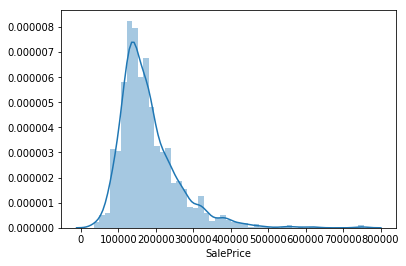

In [13]:
sns.distplot(data['SalePrice'])

As we can see, our Sale Price (variable which we will be estimating) looks like it has normal distribution with couple of outliers

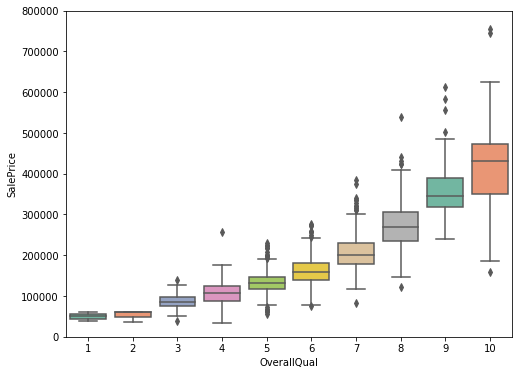

In [14]:
data_2 = pd.concat([data['SalePrice'], data['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data, palette = sns.color_palette("Set2"))
fig.axis(ymin=0, ymax=800000);

It's pretty obvious but one doesnt have to know that Sale Price can increase with Overall Quality of a house/building

## Distribution Plots for all variables considered for modeling

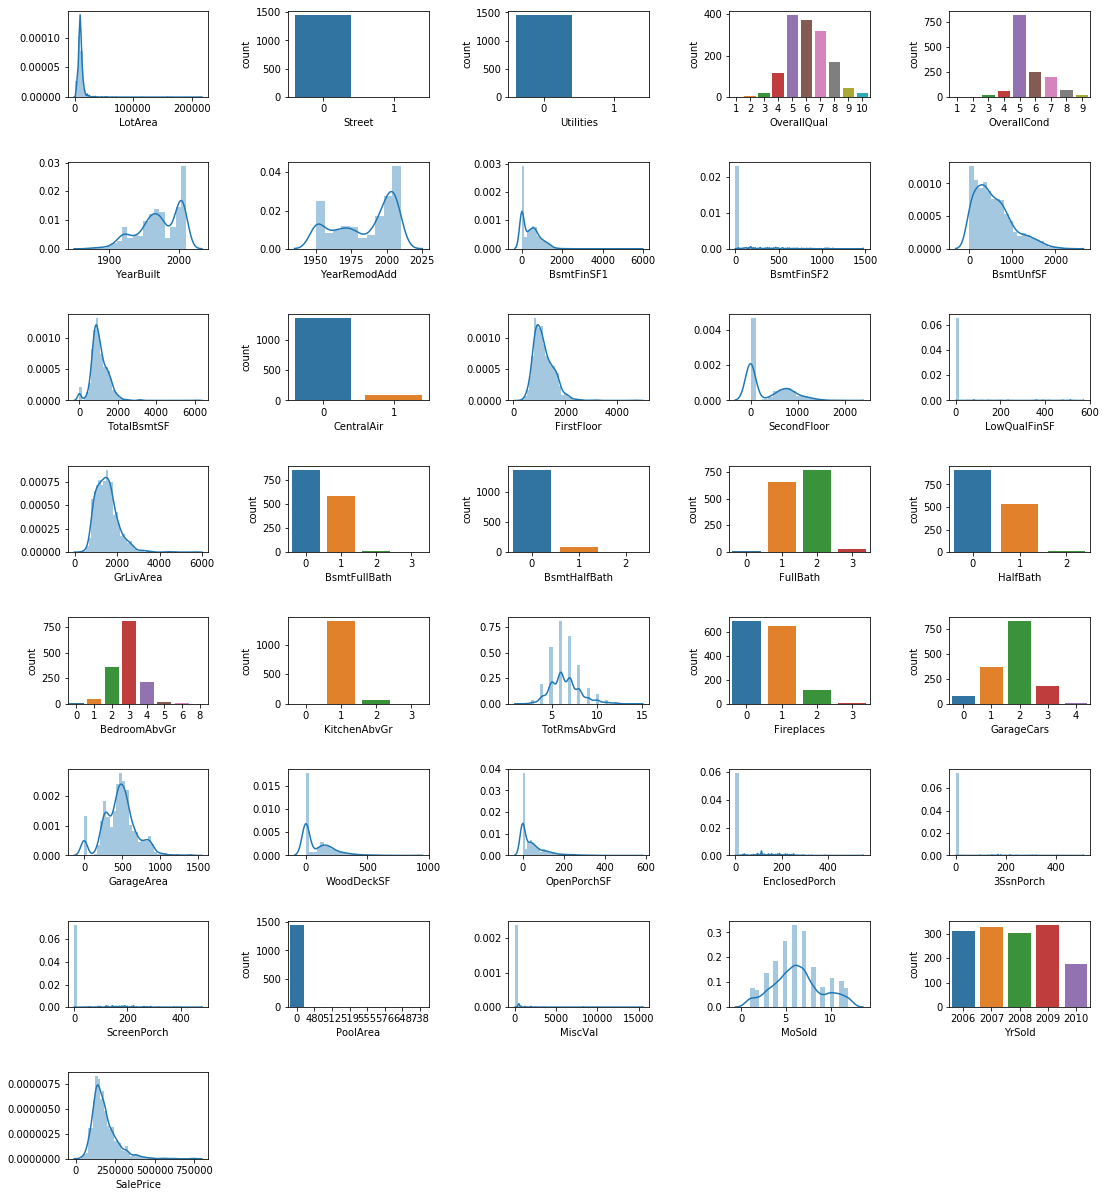

In [15]:
# Let's take a look at the distribution of all variables
fig = plt.figure(figsize=(16,40))

for i, col in enumerate(data.columns[2:]):
    ax = fig.add_subplot(19, 5, i + 1)
    if len(data[col].unique()) > 10:
        sns.distplot(data[col])
    else:
        sns.countplot(data[col])

fig.tight_layout(pad=3)

## Removing Outliers
We will make use of our extreme knowledge gathered from the graphs above and perform trimming the distributions to avoid outliers, which can reflect further in model estimation bias

In [16]:
previous = data.shape

data = data.query('''SalePrice < 400000 & LotArea < 25000 & BsmtFinSF1 < 2000 & TotalBsmtSF < 2500 & GrLivArea < 3000 & WoodDeckSF < 400 & OpenPorchSF < 200''')

columns_to_drop = ['Street','Utilities','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal']
data = data.drop(columns=columns_to_drop)

data.loc[data.PoolArea > 0,'PoolArea'] = 1
data.loc[data.SecondFloor > 0,'HasSecondFloor'] = 1
data.loc[data.SecondFloor == 0,'HasSecondFloor'] = 0

# Indeed the number of variables decrease! Yay
print(previous)
print(data.shape)

(1460, 38)
(1317, 29)


<p></p>
Few words of explanation here... We had a lifelong debate about how to count baths and bedrooms in basement... As Americans count their floors from 1st, we finally made an agreement that if they say "Above Ground" it means also 1st floor which is ground floor...... <p></p>
PS. Above Grade - in Home Sallers lingo means Above Ground

![](https://www.gimme-shelter.com/wp-content/uploads/2012/08/Above-Grade-Illustration-602x339.png)

## Data Engineering

Here we decided to change variable YearBuilt and YearRemodAdd, which are respectively: Year when house were built and Year when house was renovated, to variables more usefull in terms of modeling. Thus we invented our two brand new variables: buildingAge and YearsSinceRemodelling, which are calculated as follows:

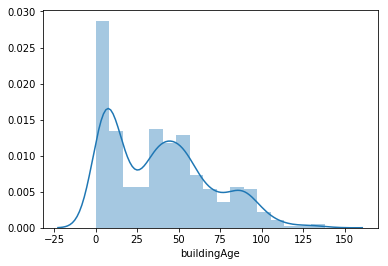

In [20]:
data['buildingAge'] = max(data['YearBuilt']) - data['YearBuilt']
sns.distplot(data['buildingAge'])

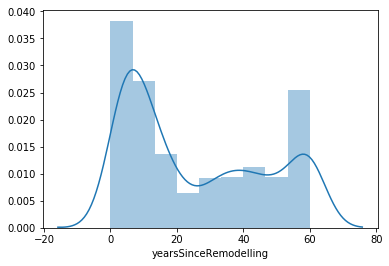

In [21]:
# If there saw no remodelling, it shows the buildingAge (possibly + 1)
data['yearsSinceRemodelling'] = max(data['YearBuilt']) - data['YearRemodAdd']
sns.distplot(data['yearsSinceRemodelling'])

### Yet, another close look at all variables

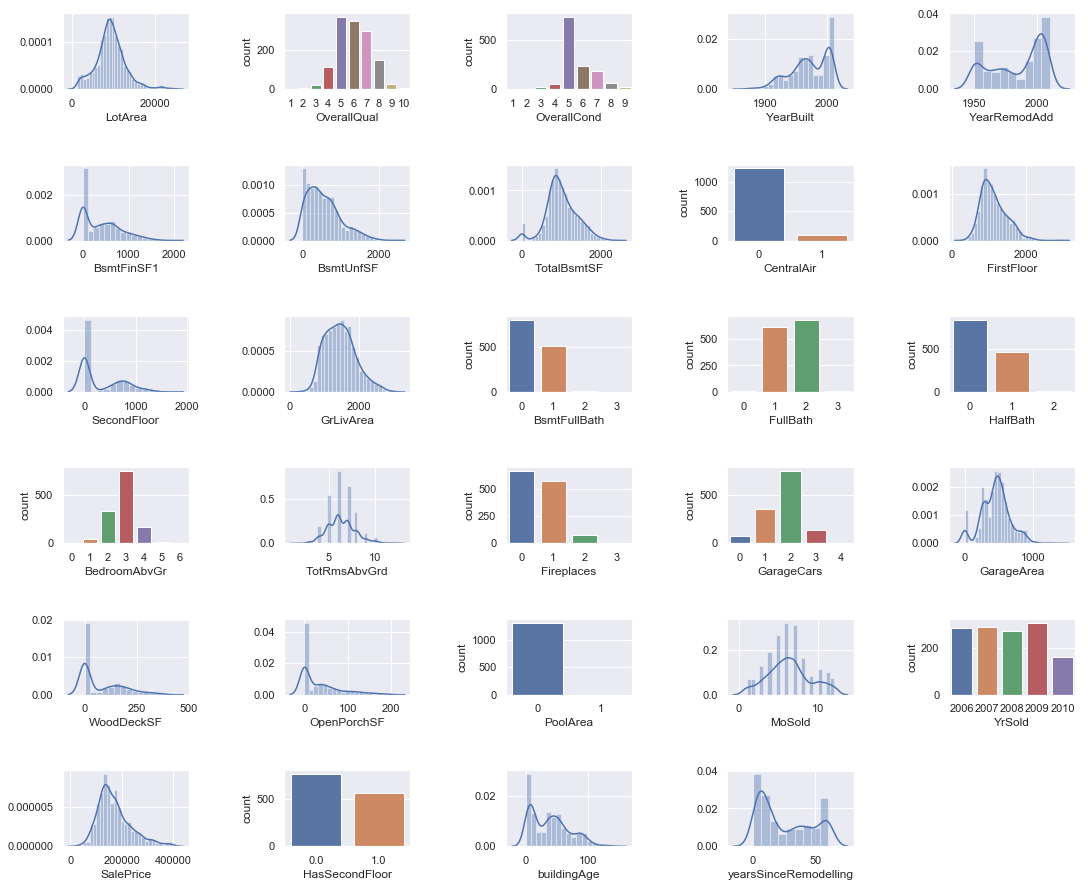

In [47]:
# Let's take a look at the distribution of all variables
fig = plt.figure(figsize=(16,40))

for i, col in enumerate(data.columns[2:]):
    ax = fig.add_subplot(19, 5, i + 1)
    if len(data[col].unique()) > 10:
        sns.distplot(data[col])
    else:
        sns.countplot(data[col])

fig.tight_layout(pad=3)

## Correlations

In this part we investigated correlations and relationships amond variables to define which of them we will have to drop arbitraly in terms of modeling simple OLS (Correlations amond variables doesnt affect our other models aka. Ridge, Lasso and ElasticNet)

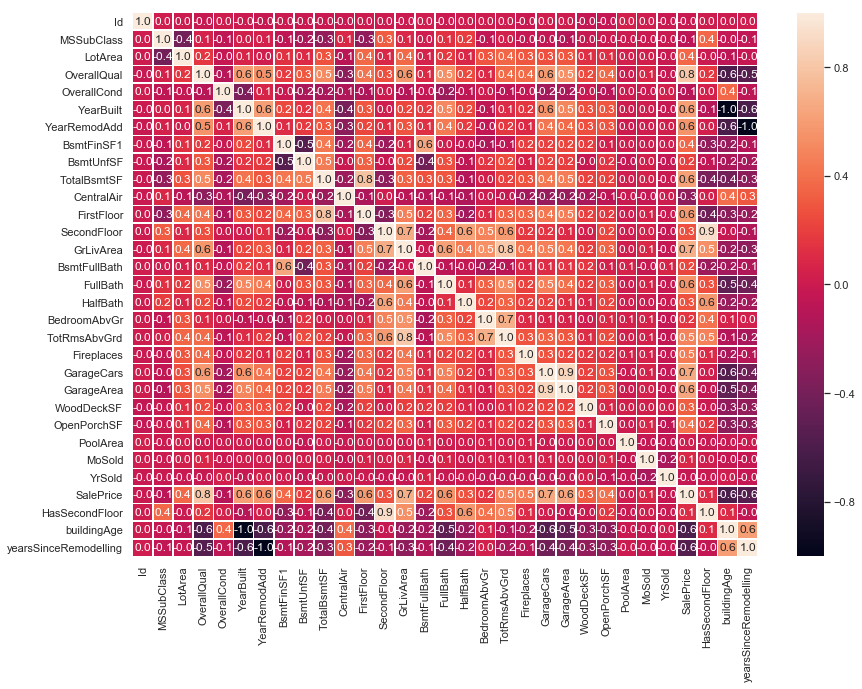

In [44]:
f,ax = plt.subplots(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

### Looking for obvious patterns among most importan variables

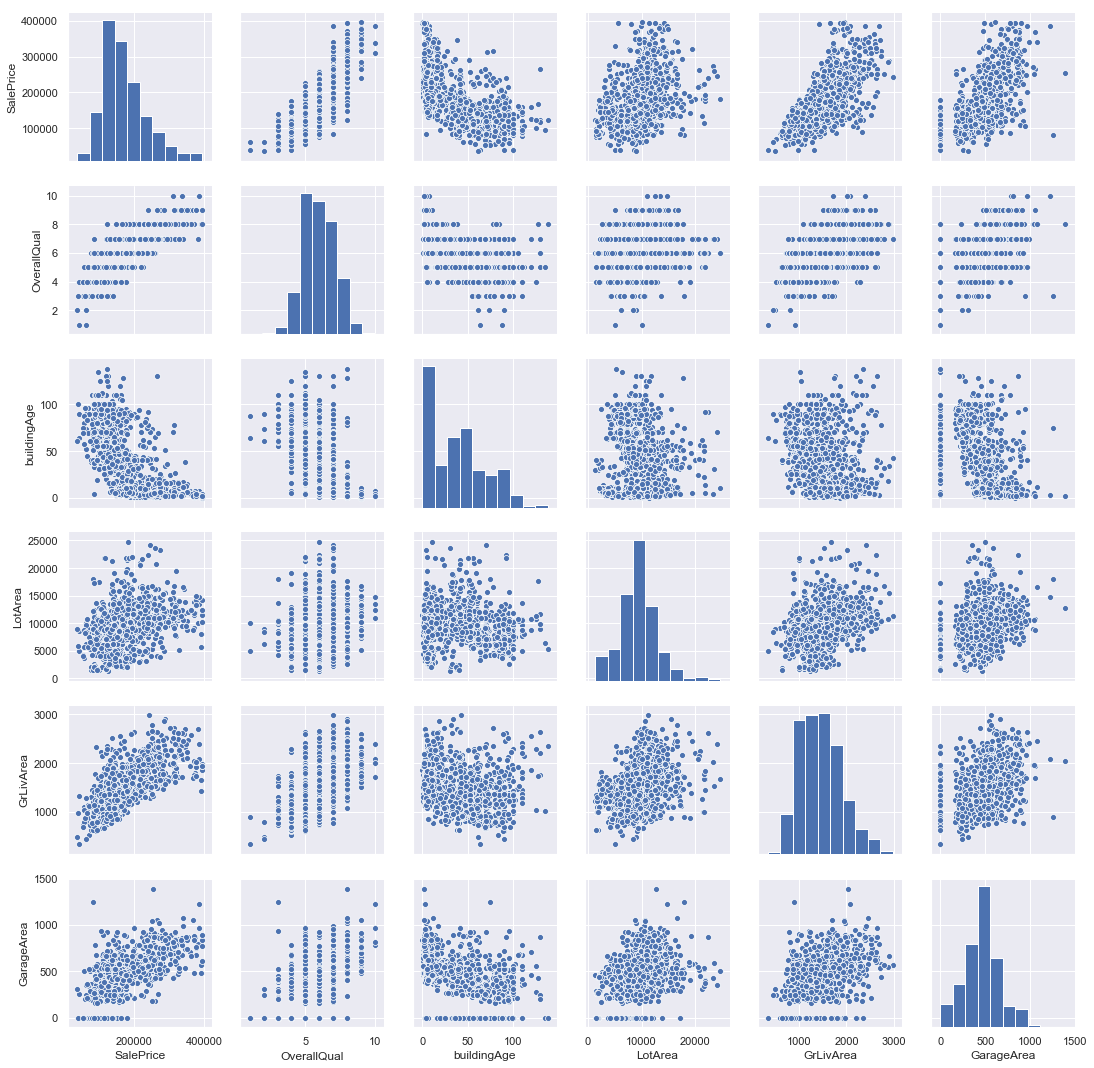

In [22]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'buildingAge', 'LotArea','GrLivArea','GarageArea']
sns.pairplot(data[cols], height = 2.5)
plt.show()

# Model estimation

In this part we will try to estimate our models: OLS, Ridge, Lasso and ElasticNet
We will make feature selection for the OLS, as the results of the OLS prediction with correlated variables is biased,
For others we will use all of our features, and at the end compare results
Which one is the most efficient in terms of speed, R^2 and amount of work needed to implement?
Lets find out!

## Feature selection

In [180]:
features = data.columns.tolist()
features.remove("SalePrice")
features.remove("Id")
features.remove('GarageCars')
features.remove('MSSubClass')
features.remove('YearBuilt')
features.remove('YearRemodAdd')
print(features)

['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', 'FirstFloor', 'SecondFloor', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea', 'MoSold', 'YrSold', 'HasSecondFloor', 'buildingAge', 'yearsSinceRemodelling']


In [181]:
#Do not Include
# X_train, X_test, y_train, y_test = train_test_split(data[features], data['SalePrice'], test_size=0.3, random_state=0)

# X_train = pd.DataFrame(X_train)
# X_train.columns = features

# X_test = pd.DataFrame(X_test)
# X_test.columns = features

# y_train = pd.DataFrame(y_train)
# y_train.columns = ['SalePrice']

# y_test = pd.DataFrame(y_test)
# y_test.columns = ['SalePrice']

## Estimating the first model (trial version without CrossValidation): In-sample prediction

In [182]:
mod = smf.ols(formula="SalePrice ~ {}".format(' + '.join(features)), data=data)
res = mod.fit()
y_pred = res.predict(data)
display(res.summary())
print("\n")
print(y_pred.head(10))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     341.7
Date:                Mon, 27 May 2019   Prob (F-statistic):               0.00
Time:                        20:48:41   Log-Likelihood:                -15114.
No. Observations:                1317   AIC:                         3.028e+04
Df Residuals:                    1291   BIC:                         3.042e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              7.921e+05      1e+06      0.791      0.429   -1.17e+06    2.76e+06
LotArea                   1.6623      0.217      7.646      0.000       1.236       2.089
OverallQual            1.449e+04    850.343     17.035      0.000    1.28e+04    1.62e+04
OverallCond            4499.3247    755.369      5.956      0.000    3017.438    5981.211
BsmtFinSF1               18.3222      4.616      3.970      0.000       9.267      27.377
BsmtUnfSF                 1.1705      4.650      0.252      0.801      -7.951      10.293
TotalBsmtSF              20.1256      5.404      3.724      0.000       9.525      30.727
CentralAir             6336.4899   3065.922      2.067      0.039     321.755    1.24e+04
FirstFloor               23.9643     16.551      1.448      0.148      -8.505      56.433
SecondFloor              42.9660     17.201      2.498      0.013       9.222      76.710
GrLivArea                23.2670     16.382      1.420      0.156      -8.872      55.406
BsmtFullBath           2706.9473   1774.293      1.526      0.127    -773.866    6187.760
FullBath              -2184.6278   2007.162     -1.088      0.277   -6122.284    1753.028
HalfBath              -1480.9605   1943.782     -0.762      0.446   -5294.278    2332.357
BedroomAbvGr          -7423.7917   1240.511     -5.984      0.000   -9857.430   -4990.153
TotRmsAbvGrd           1391.5268    890.815      1.562      0.119    -356.078    3139.131
Fireplaces             5463.0995   1268.225      4.308      0.000    2975.091    7951.108
GarageArea               28.5634      4.232      6.750      0.000      20.261      36.865
WoodDeckSF               19.0817      6.839      2.790      0.005       5.664      32.499
OpenPorchSF              50.0430     15.430      3.243      0.001      19.772      80.314
PoolArea              -9663.8933   1.38e+04     -0.702      0.483   -3.67e+04    1.73e+04
MoSold                  245.6626    248.187      0.990      0.322    -241.232     732.558
YrSold                 -414.3874    498.370     -0.831      0.406   -1392.091     563.316
HasSecondFloor         -1.39e+04   3903.499     -3.560      0.000   -2.16e+04   -6239.421
buildingAge            -365.1931     44.208     -8.261      0.000    -451.921    -278.465
yearsSinceRemodelling  -237.8823     46.349     -5.132      0.000    -328.811    -146.954
==============================================================================
Omnibus:                      182.081   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              964.102
Skew:                           0.521   Prob(JB):                    4.45e-210
Kurtosis:                       7.060   Cond. No.                     1.60e+07
==============================================================================



0   154349.99
1   285818.59
2   243778.85
3   169846.11
4   240353.39
5   116278.14
6   236974.30
7   115998.18
8   266385.79
9   217901.88
dtype: float64


## Model Estimation with CrossValidation

In [184]:
kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0,10000))

r2 = []
r2T = []
print("\n")
for train, test in kf.split(data.index.values):
    reg = linear_model.LinearRegression()
    reg.fit(data.iloc[train][features], data.iloc[train]["SalePrice"])
    predsTrain = reg.predict(data.iloc[train][features])
    preds = reg.predict(data.iloc[test][features])
    r2.append(r2_score(data.iloc[test].SalePrice, preds))
    r2T.append(r2_score(data.iloc[train].SalePrice, predsTrain))
    print(round(np.mean(r2T), 4), round(np.mean(r2), 4), "diff:", round(np.mean(r2T), 4)-round(np.mean(r2), 4))



0.8685 0.8618 diff: 0.006700000000000039
0.8684 0.8646 diff: 0.0037999999999999146
0.8689 0.8632 diff: 0.005700000000000038
0.8684 0.866 diff: 0.0023999999999999577
0.8693 0.8626 diff: 0.006699999999999928


<p></p>
As we could observe, it works more than decent, but there is a lot of correlated variables - so we have to get rid of them!
<p></p>
Anyway, Let us make some basic scatterplot to visualise that data points are fitted well to our Regression Line
<p></p>

/Users/Kornel/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


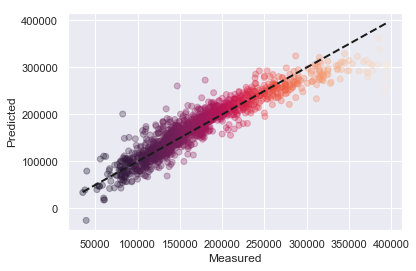

In [185]:
y = data['SalePrice']
fig,ax = plt.subplots()
plt.scatter(data["SalePrice"].values, res.predict(), c= data["SalePrice"].values, alpha=0.3)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

Plot below shows how our estimations differ from real values of dependent variable

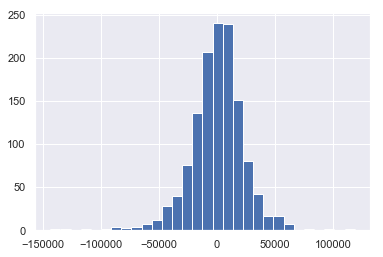

In [186]:
plt.hist(res.predict() - data["SalePrice"].values, bins=30)
plt.show()

## OLS model with adjusted features
Here we will adjust our feature list, to be more relevant and not include highly correlated variables

In [187]:
features2 = ['LotArea',
             'OverallQual',
             'OverallCond',
             'buildingAge', 
             'yearsSinceRemodelling', 
             'BsmtFinSF1',
             'TotalBsmtSF',
             'CentralAir',
             'GrLivArea',  
             'Fireplaces', 
             'GarageArea',
             'WoodDeckSF', 
             'OpenPorchSF']

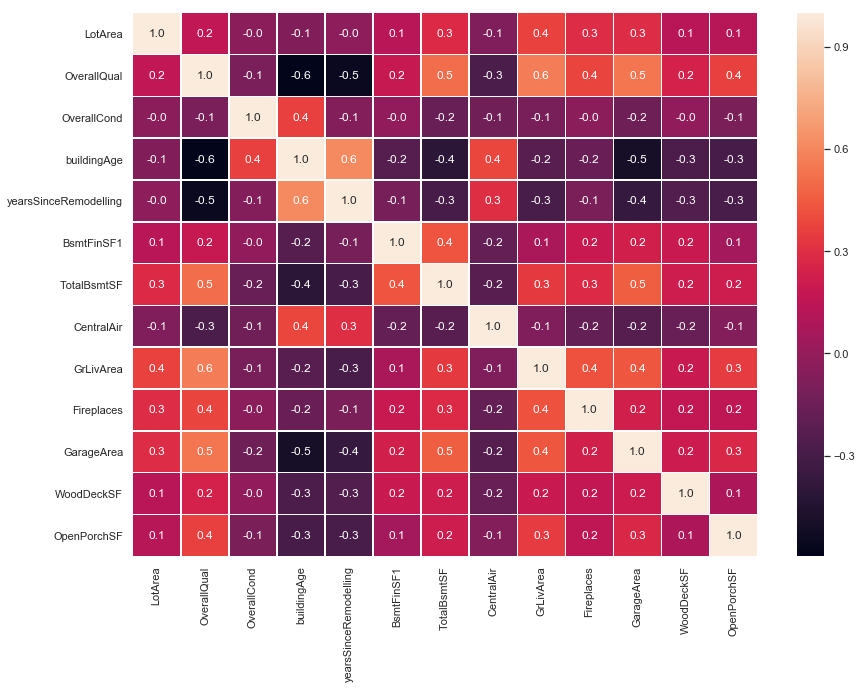

In [188]:
f,ax = plt.subplots(figsize=(14, 10))
sns.heatmap(data[features2].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [189]:
mod2 = smf.ols(formula="SalePrice ~ {}".format(' + '.join(features2)), data=data)
res2 = mod2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     628.7
Date:                Mon, 27 May 2019   Prob (F-statistic):               0.00
Time:                        20:49:07   Log-Likelihood:                -15145.
No. Observations:                1317   AIC:                         3.032e+04
Df Residuals:                    1303   BIC:                         3.039e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -4.957e+04   6417.088     -7.725      0.000   -6.22e+04    -3.7e+04
LotArea                   1.5667      0.215      7.295      0.000       1.145       1.988
OverallQual            1.492e+04    838.468     17.791      0.000    1.33e+04    1.66e+04
OverallCond            4159.2432    759.970      5.473      0.000    2668.345    5650.141
buildingAge            -358.2261     39.446     -9.082      0.000    -435.610    -280.842
yearsSinceRemodelling  -278.6067     45.900     -6.070      0.000    -368.652    -188.561
BsmtFinSF1               20.9782      1.846     11.363      0.000      17.356      24.600
TotalBsmtSF              20.7353      2.294      9.040      0.000      16.236      25.235
CentralAir             8327.7889   3065.714      2.716      0.007    2313.513    1.43e+04
GrLivArea                42.4448      2.115     20.072      0.000      38.296      46.593
Fireplaces             6592.1161   1258.318      5.239      0.000    4123.565    9060.668
GarageArea               33.6709      4.233      7.955      0.000      25.367      41.975
WoodDeckSF               19.6726      6.912      2.846      0.004       6.112      33.233
OpenPorchSF              53.3614     15.548      3.432      0.001      22.859      83.864
==============================================================================
Omnibus:                      198.338   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              989.754
Skew:                           0.603   Prob(JB):                    1.20e-215
Kurtosis:                       7.072   Cond. No.                     9.94e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Estimation with CrossValidation

In [190]:
kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0,10000))

r2 = []
r2T = []
print("\n")
for train, test in kf.split(data.index.values):
    reg = linear_model.LinearRegression()
    reg.fit(data.iloc[train][features2], data.iloc[train]["SalePrice"])
    predsTrain = reg.predict(data.iloc[train][features2])
    preds = reg.predict(data.iloc[test][features2])
    r2.append(r2_score(data.iloc[test].SalePrice, preds))
    r2T.append(r2_score(data.iloc[train].SalePrice, predsTrain))
    print(round(np.mean(r2T), 4), round(np.mean(r2), 4), "diff:", round(np.mean(r2T), 4)-round(np.mean(r2), 4))



0.8597 0.8692 diff: -0.009499999999999953
0.8636 0.8519 diff: 0.011700000000000044
0.8608 0.8638 diff: -0.0030000000000000027
0.8622 0.8586 diff: 0.0035999999999999366
0.8627 0.8575 diff: 0.005199999999999982


/Users/Kornel/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


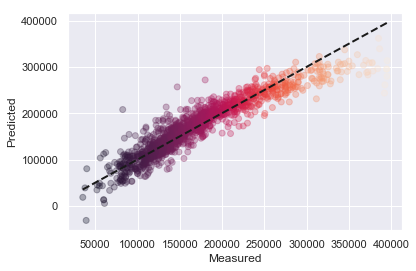

In [191]:
y = data['SalePrice']
fig,ax = plt.subplots()
plt.scatter(data["SalePrice"].values, res2.predict(), c= data["SalePrice"].values, alpha=0.3)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

Plot below shows how our estimations differ from real values of dependent variable

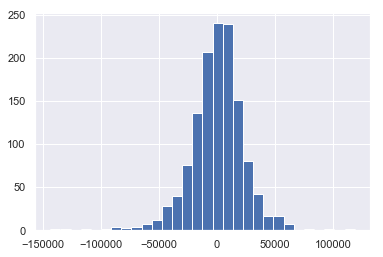

In [192]:
plt.hist(res.predict() - data["SalePrice"].values, bins=30)
plt.show()

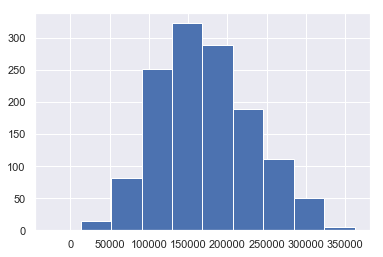

In [193]:
plt.hist(res.predict())
plt.show()

# Estimating alpha for Ridge, LASSO, ElasticNet
## Ridge

![](https://chrisalbon.com/images/machine_learning_flashcards/Ridge_Regression_print.png)

Good article about how Ridge Regression works: https://towardsdatascience.com/ridge-regression-for-better-usage-2f19b3a202db

In [194]:
kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0,10000))
for alpha in [0.0001, 0.1, 0.25, 0.5, 1, 2, 5, 10, 10000]:
    r2 = []
    r2T = []
    for train, test in kf.split(data.index.values):
        reg = linear_model.Ridge(alpha = alpha, max_iter=10000)
        reg.fit(data.iloc[train][features], data.iloc[train]["SalePrice"])
        predsTrain = reg.predict(data.iloc[train][features])
        preds = reg.predict(data.iloc[test][features])
        r2.append(r2_score(data.iloc[test].SalePrice, preds))
        r2T.append(r2_score(data.iloc[train].SalePrice, predsTrain))
    print(round(np.mean(r2T), 4), round(np.mean(r2), 4), ' --- ', alpha)

0.8691 0.8615  ---  0.0001
0.8691 0.8615  ---  0.1
0.8691 0.8616  ---  0.25
0.8691 0.8616  ---  0.5
0.8691 0.8617  ---  1
0.8691 0.8618  ---  2
0.869 0.8618  ---  5
0.8689 0.8619  ---  10
0.8225 0.8152  ---  10000


## LASSO

![](https://tektrace.files.wordpress.com/2016/04/lasso2.png?w=654&h=194)

In [195]:
kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0,10000))
for alpha in [0.1, 1, 10, 100, 300, 500, 700, 1000, 5000, 10000, 100000]:
    r2 = []
    r2T = []
    for train, test in kf.split(data.index.values):
        reg = linear_model.Lasso (alpha = alpha, max_iter=10000)
        reg.fit(data.iloc[train][features], data.iloc[train]["SalePrice"])
        predsTrain = reg.predict(data.iloc[train][features])
        preds = reg.predict(data.iloc[test][features])
        r2.append(r2_score(data.iloc[test].SalePrice, preds))
        r2T.append(r2_score(data.iloc[train].SalePrice, predsTrain))
    print(round(np.mean(r2T), 4), round(np.mean(r2), 4),  round(np.mean(r2T) - np.mean(r2), 4), ' --- ', alpha)

0.8694 0.8624 0.007  ---  0.1
0.8694 0.8624 0.007  ---  1
0.8694 0.8625 0.0069  ---  10
0.8691 0.8626 0.0066  ---  100
0.8676 0.8615 0.0061  ---  300
0.8662 0.8608 0.0054  ---  500
0.8657 0.8605 0.0052  ---  700
0.8649 0.8597 0.0051  ---  1000
0.8484 0.844 0.0044  ---  5000
0.8219 0.8163 0.0055  ---  10000
0.8075 0.8027 0.0048  ---  100000


# ElasticNet

![](http://article.sapub.org/image/10.5923.j.ajms.20170702.03_035.gif)

In [196]:
kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0,10000))
for ratio in [0.1, 0.25, 0.5, 0.75, 0.9]:
    for alpha in [0.1, 1, 10, 100, 300, 500, 700, 1000, 5000, 10000, 100000]:
        r2 = []
        r2T = []
        for train, test in kf.split(data.index.values):
            reg = linear_model.ElasticNet (alpha = alpha, l1_ratio=ratio, max_iter=10000)
            reg.fit(data.iloc[train][features], data.iloc[train]["SalePrice"])
            predsTrain = reg.predict(data.iloc[train][features])
            preds = reg.predict(data.iloc[test][features])
            r2.append(r2_score(data.iloc[test].SalePrice, preds))
            r2T.append(r2_score(data.iloc[train].SalePrice, predsTrain))
        print(round(np.mean(r2T), 4), round(np.mean(r2), 4),  round(np.mean(r2T) - np.mean(r2), 4),' ------ ', alpha,' ------ ', ratio)
    print('\n ----- \n')

0.8674 0.8593 0.0081  ------  0.1  ------  0.1
0.8514 0.8438 0.0076  ------  1  ------  0.1
0.8231 0.8154 0.0077  ------  10  ------  0.1
0.8149 0.8074 0.0075  ------  100  ------  0.1
0.8097 0.8021 0.0075  ------  300  ------  0.1
0.8045 0.7968 0.0077  ------  500  ------  0.1
0.7997 0.792 0.0078  ------  700  ------  0.1
0.7936 0.7857 0.0079  ------  1000  ------  0.1
0.7614 0.7531 0.0083  ------  5000  ------  0.1
0.7493 0.7412 0.0081  ------  10000  ------  0.1
0.6817 0.6744 0.0074  ------  100000  ------  0.1

 ----- 

0.8677 0.8596 0.0082  ------  0.1  ------  0.25
0.8538 0.8462 0.0076  ------  1  ------  0.25
0.8244 0.8167 0.0078  ------  10  ------  0.25
0.8154 0.8078 0.0075  ------  100  ------  0.25
0.811 0.8035 0.0075  ------  300  ------  0.25
0.8066 0.799 0.0076  ------  500  ------  0.25
0.8024 0.7947 0.0077  ------  700  ------  0.25
0.7969 0.789 0.0078  ------  1000  ------  0.25
0.7648 0.7564 0.0083  ------  5000  ------  0.25
0.7523 0.7441 0.0082  ------  10000  -----

# Model Comparision

![](https://www.biorxiv.org/content/biorxiv/early/2018/05/31/335695/F6.large.jpg)

In [240]:
# OLS without feature selection
mod = smf.ols(formula="SalePrice ~ {}".format(' + '.join(features)), data=data)
res = mod.fit()
ypred = res.predict(data)
print("\n")
print(round(res.rsquared,4),"OLS - correlation among variables")
print("MSE:",round(rmse(data['SalePrice'].values,ypred),2),"OLS - correlation among variables")
print("MAE:",round(metrics.mean_squared_error(data['SalePrice'].values,ypred),2),"OLS - correlation among variables\n")

# OLS with feature selection (no correlation)
mod2 = smf.ols(formula="SalePrice ~ {}".format(' + '.join(features2)), data=data)
res2 = mod2.fit()
ypred2 = res2.predict(data)
print(round(res2.rsquared,4),"OLS - with feature selection")
print("MSE:",round(rmse(data['SalePrice'].values,ypred2),4),"OLS - with feature selection")
print("MAE:",round(metrics.mean_squared_error(data['SalePrice'].values,ypred2),2),"OLS - with feature selection\n")

# Ridge
ridgeList = []
mean_squared_error_ridge = []
mean_absolute_error_ridge = []
for train, test in kf.split(data.index.values):
    reg = linear_model.Ridge(alpha = 10, max_iter=100000)
    reg.fit(data.iloc[train][features], data.iloc[train]["SalePrice"])
    preds = reg.predict(data.iloc[test][features])
    mean_squared_error = round(metrics.mean_squared_error(data.iloc[test].SalePrice.values,preds),2)
    mean_squared_error_ridge.append(mean_squared_error)
    mean_absolute_error = round(metrics.mean_absolute_error(data.iloc[test].SalePrice.values,preds),2)
    mean_absolute_error_ridge.append(mean_absolute_error)
    ridgeList.append(r2_score(data.iloc[test].SalePrice, preds))
print(round(np.mean(ridgeList),4),"Ridge")
print("MSE:",np.mean(mean_squared_error_ridge),"Ridge")
print("MAE:",np.mean(mean_absolute_error_ridge),"Ridge\n")
    
# Lasso
lassoList = []
mean_squared_error_lasso = []
mean_absolute_error_lasso = []
for train, test in kf.split(data.index.values):
    reg = linear_model.Lasso(alpha = 500, max_iter=100000)
    reg.fit(data.iloc[train][features], data.iloc[train]["SalePrice"])
    preds = reg.predict(data.iloc[test][features])
    mean_squared_error = round(metrics.mean_squared_error(data.iloc[test].SalePrice.values,preds),2)
    mean_squared_error_lasso.append(mean_squared_error)
    mean_absolute_error = round(metrics.mean_absolute_error(data.iloc[test].SalePrice.values,preds),2)
    mean_absolute_error_lasso.append(mean_absolute_error)
    lassoList.append(r2_score(data.iloc[test].SalePrice, preds))
print(round(np.mean(lassoList),4),"Lasso")
print("MSE:",np.mean(mean_squared_error_lasso),"Lasso")
print("MAE:",np.mean(mean_absolute_error_lasso),"Lasso\n")

# ElasticNet
netList = []
mean_squared_error_elasticnet = []
mean_absolute_error_elasticnet = []
for train, test in kf.split(data.index.values):
    reg = linear_model.ElasticNet(alpha = 0.1,l1_ratio=0.75, max_iter=100000)
    reg.fit(data.iloc[train][features], data.iloc[train]["SalePrice"])
    preds = reg.predict(data.iloc[test][features])
    mean_squared_error = round(metrics.mean_squared_error(data.iloc[test].SalePrice.values,preds),2)
    mean_squared_error_elasticnet.append(mean_squared_error)
    mean_absolute_error = round(metrics.mean_absolute_error(data.iloc[test].SalePrice.values,preds),2)
    mean_absolute_error_elasticnet.append(mean_absolute_error)
    netList.append(r2_score(data.iloc[test].SalePrice, preds))
print(round(np.mean(netList),4),"ElasticNet")
print("MSE:",np.mean(mean_squared_error_elasticnet),"ElasticNet")
print("MAE:",np.mean(mean_absolute_error_elasticnet),"ElasticNet")



0.8687 OLS - correlation among variables
MSE: 23325.54 OLS - correlation among variables
MAE: 544081044.8 OLS - correlation among variables

0.8625 OLS - with feature selection
MSE: 23871.0071 OLS - with feature selection
MAE: 569824981.93 OLS - with feature selection

0.8603 Ridge
MSE: 570310851.844 Ridge
MAE: 17226.453999999998 Ridge

0.8587 Lasso
MSE: 576694025.374 Lasso
MAE: 17314.438000000002 Lasso

0.8602 ElasticNet
MSE: 570688816.1140001 ElasticNet
MAE: 17227.127999999997 ElasticNet


# Summary

As we tested variety of models throughout this paper, in the end we could notice that in terms of efficiency and lack of such a hard work with feature selection, the best option is to use Ridge or ElasticNet Regression. Those two gave us best results comparing it with the fact that we do not need to bother ourselves with correlation among variables